## Лабораторна робота 4. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, sep=';')
  return data

data = get_data(data_path="bank-additional-full.csv")
data.info(verbose=True)
print("------------------------")
print(str(data.shape[0]) + " - строк")
print(str(data.shape[1]) + " - столбцов")
print("------------------------")
for i in range(data.shape[1]):    
    print(data.columns[i] + " | max(" + str(data.max()[i]) + ") | min(" + str(data.min()[i]) + ")")
print("------------------------")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [3]:
bank_target = data["y"].replace(["no", "yes"], [0, 1])
bank_target.head(185)

0      0
1      0
2      0
3      0
4      0
      ..
180    0
181    0
182    1
183    0
184    0
Name: y, Length: 185, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [4]:
bank_client = data[["age", "job", "marital", "education", "default", "housing", "loan"]]
bank_client.head(10)

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
5,45,services,married,basic.9y,unknown,no,no
6,59,admin.,married,professional.course,no,no,no
7,41,blue-collar,married,unknown,unknown,no,no
8,24,technician,single,professional.course,no,yes,no
9,25,services,single,high.school,no,yes,no


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

age | max(98) | min(17)
Кількість NaN = 0


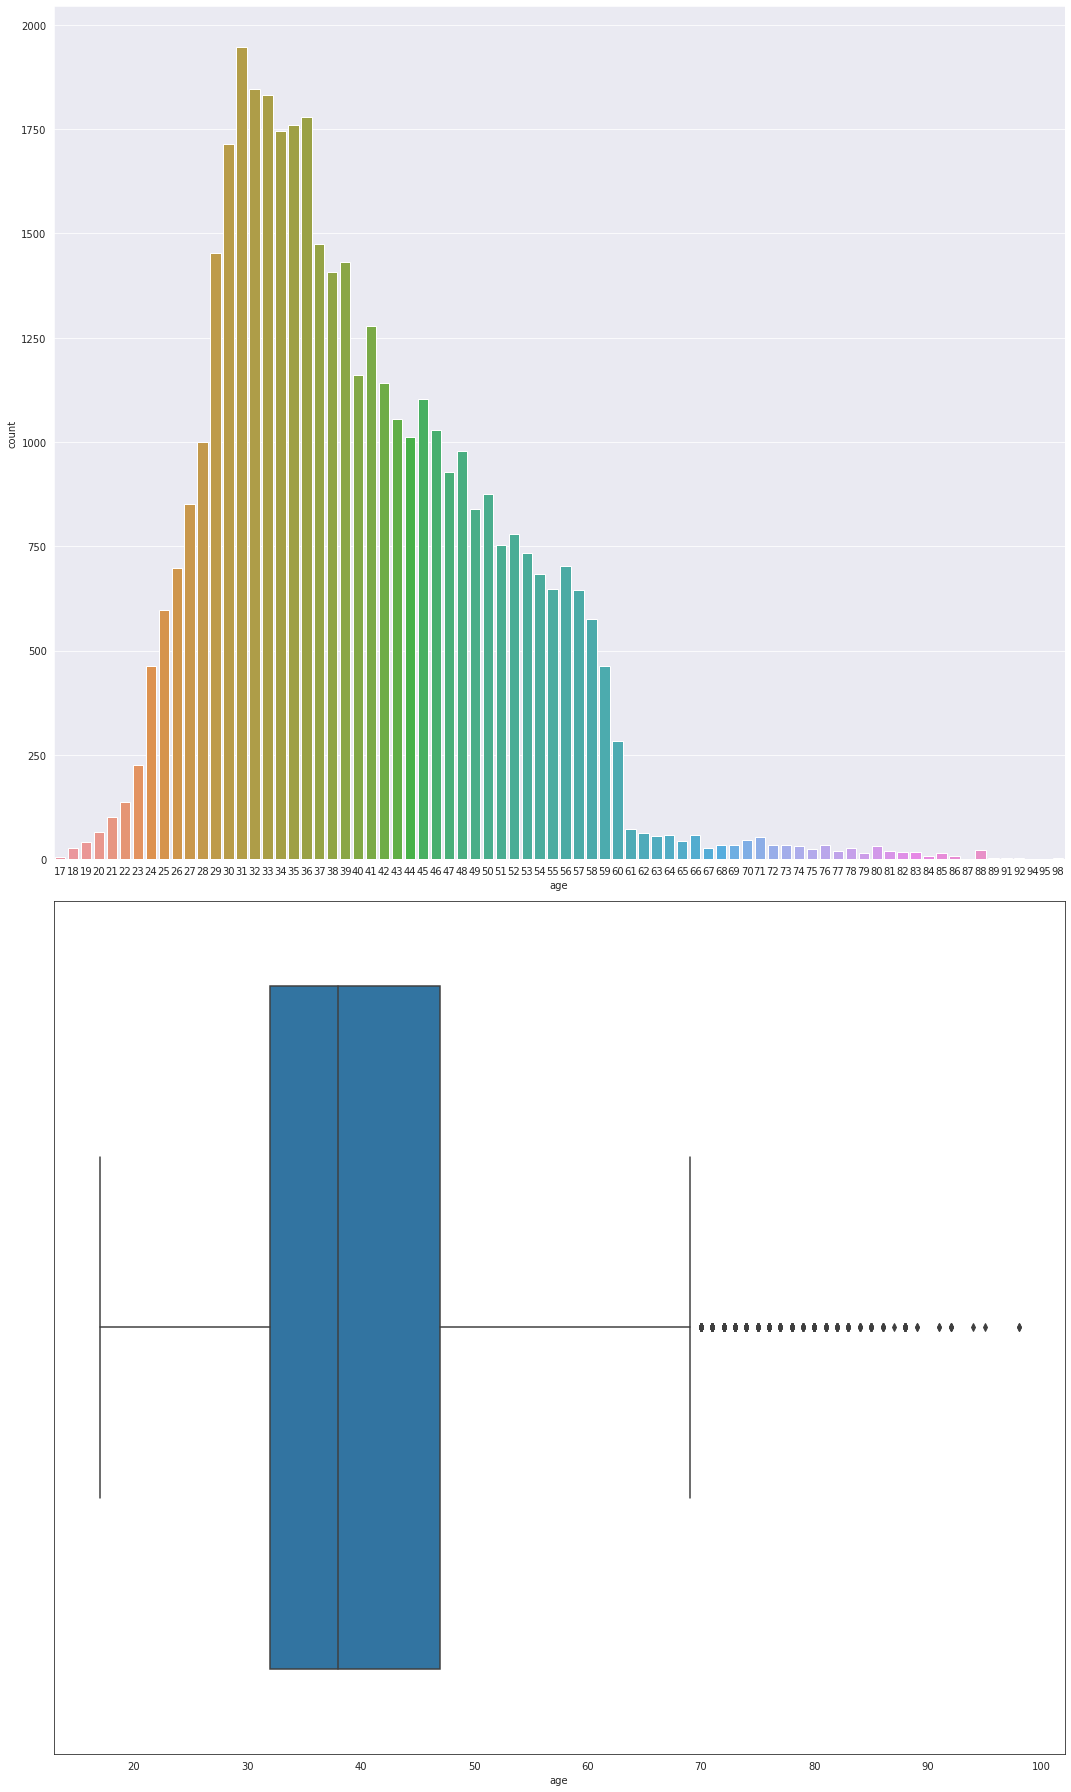

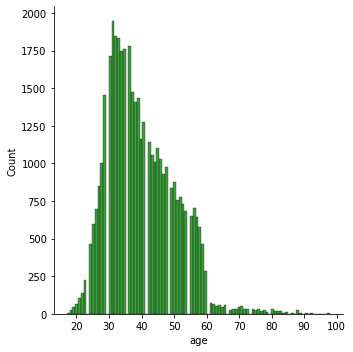

In [5]:
print("age" + " | max(" + str(data["age"].max()) + ") | min(" + str(data["age"].min()) + ")")
print("Кількість NaN = " + str(data["age"].isnull().sum()))

f = plt.figure(figsize=(15, 25))
gs = f.add_gridspec(2, 1)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.countplot(data=bank_client, x="age")

with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(data=bank_client, x="age")

f.tight_layout()

sns.displot(data=bank_client, x="age", color="green")



**Висновки з 1-4 завдання (детальні)**

1. Судячи з основної статистичної інформації вибірка не має пропусків. Розмірнівсть датасету 41188 - рядків 21 - стовбців.
2. Цільовий атрибутом (target atribute) датасету було обрано змінну y котра відображає чи згодився клієнт оформити банківський депозит.
3. Змінна age не містить пропусків, має мінімальне значення 17 а максимальне 98. Також ця змінна містить викиди а саме людей котрі старше за 70р.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [6]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - (1.5 * IQR)
    up_lim = Q3 + (1.5 * IQR)
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [7]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Атрибут age має два викиди за умови якщо нижній персентель 10 а верхній 90. 
2. IQR є різницею верхнього 28 і нижнього персентеля 55 і дорівнює 27.  
3. Нижньою межею значень є -12.5 що фактично не реально а верхньою 95.5.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

Text(0.5, 1.0, 'job')

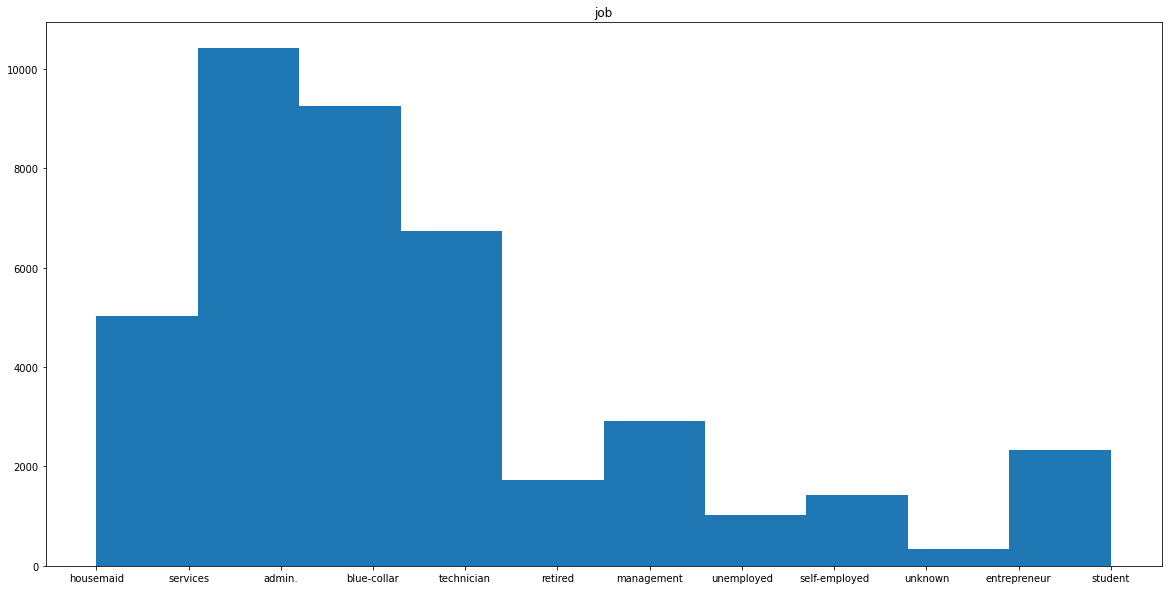

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["job"]) 
plt.title("job")

Text(0.5, 1.0, 'marital')

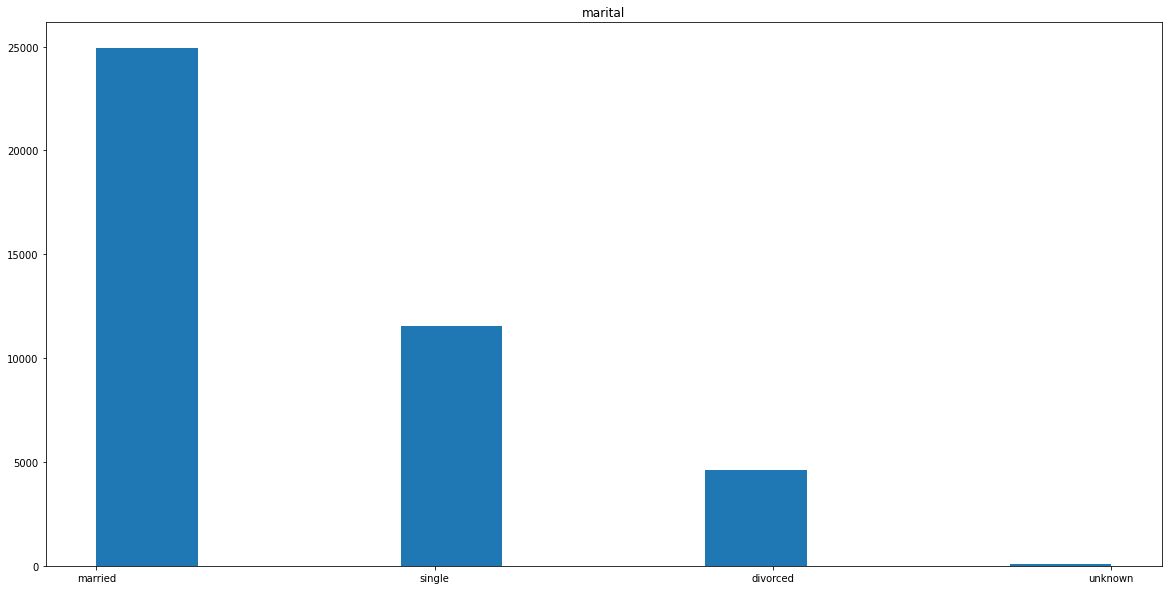

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["marital"]) 
plt.title("marital")

Text(0.5, 1.0, 'education')

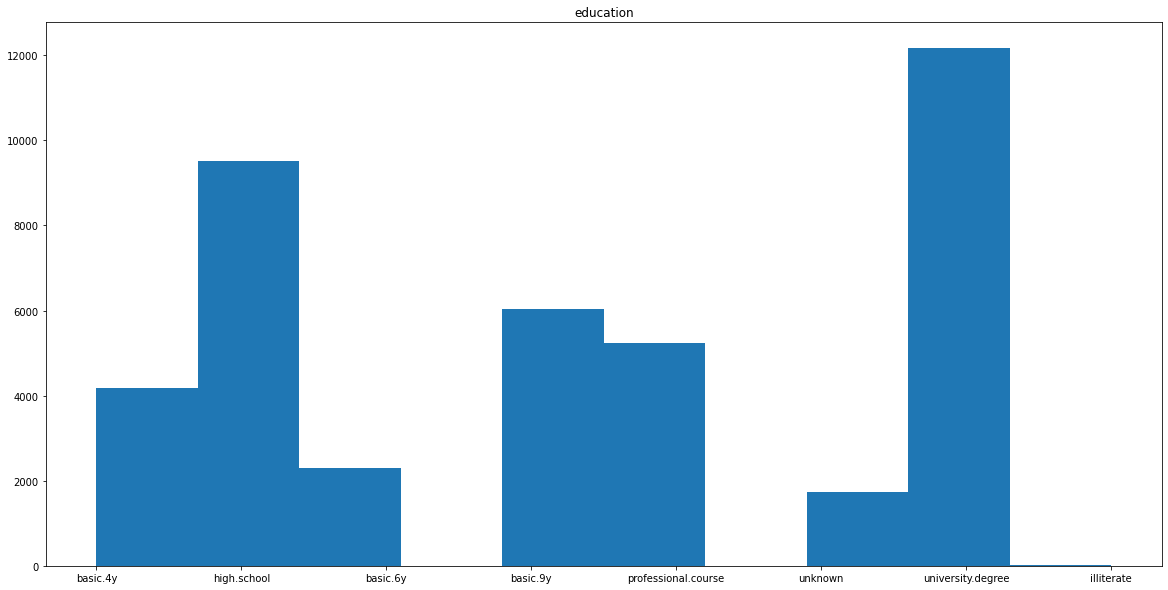

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["education"]) 
plt.title("education")

**Висновки з завдання 6 (детальні)**

1. Я отримав гістограму розподілу змінної job з якої зрозуміло що більшість кліентів цього банку працюють адмніністраторами, різноробочими та техніками.
2. Я отримав гістограму розподілу змінної marital з якої зрозуміло що більшість клієнтів банку одружені.
3. Я отримав гістограму розподілу змінної education з якої зрозуміло що більшість клієнтів банку мають вищу освіту або закінчили останні класи школи.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

Text(0.5, 1.0, 'default')

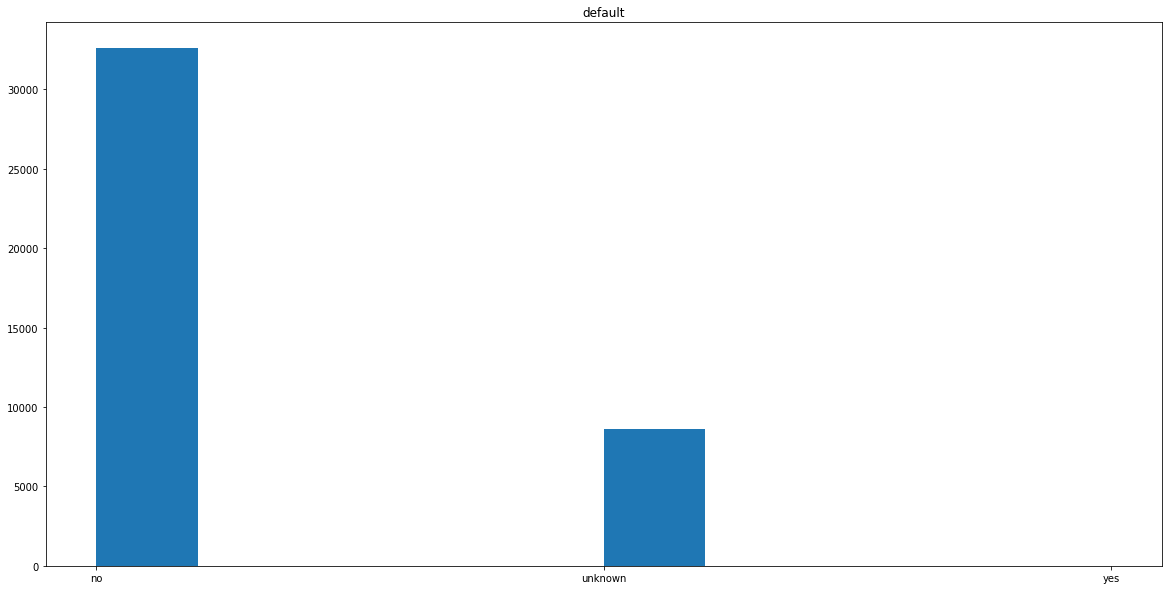

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["default"]) 
plt.title("default")

Text(0.5, 1.0, 'housing')

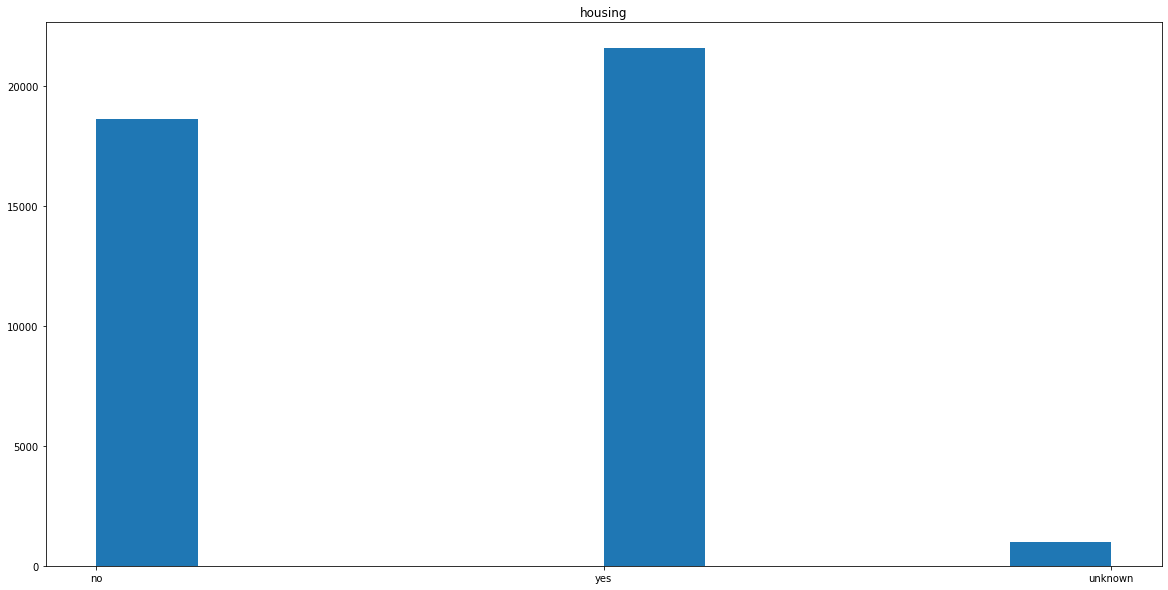

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["housing"]) 
plt.title("housing")

Text(0.5, 1.0, 'loan')

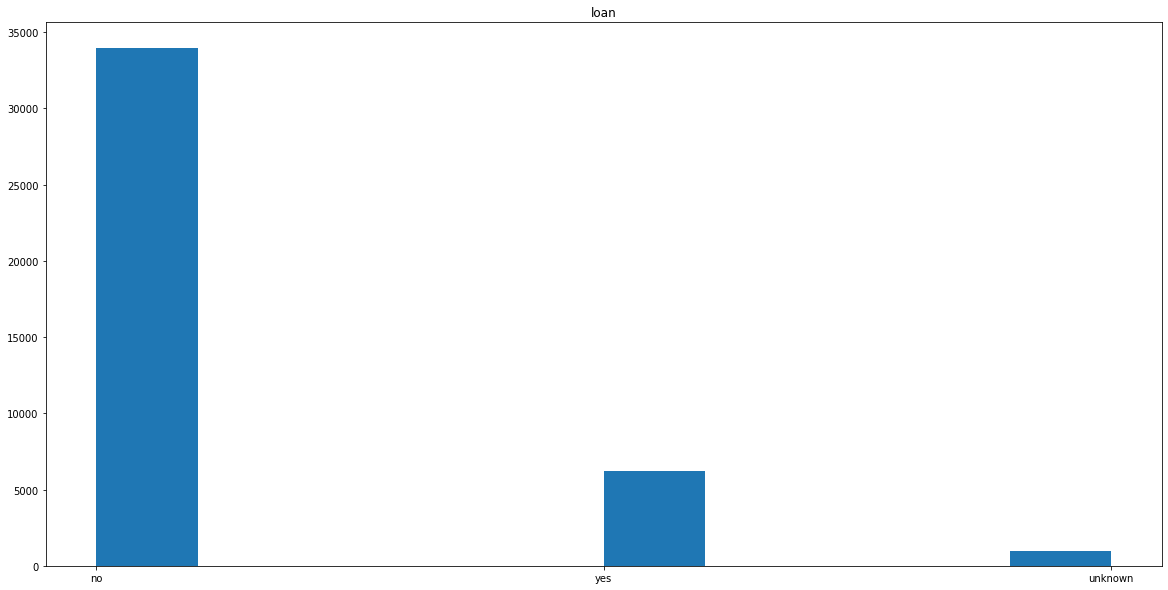

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.hist(data["loan"]) 
plt.title("loan")

Висновок 7
1)Я отримав гістограму розподілу змінної default з якої зрозуміло, що вибірка створювалася із людей котрі не мають кредита це вібулося по причині того що виборка робилася для прогнозування депозито спроможності. 
2)Я отримав гістограму розподілу змінної housing з якої зрозуміло, що більшість клієнтів цього банку мають іпотеку на житло.
3)Я отримав гістограму розподілу змінної loan з якої зрозуміло, що більшість клієнтів цього банку не мають позик. 

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [14]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        le.fit(df[col].unique())
        df[col] = le.transform(df[col])
      
    return df

In [15]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])


In [16]:
print(bank_client.head(10))

   age  job  marital  education  default  housing  loan
0   56    3        1          0        0        0     0
1   57    7        1          3        1        0     0
2   37    7        1          3        0        2     0
3   40    0        1          1        0        0     0
4   56    7        1          3        0        0     2
5   45    7        1          2        1        0     0
6   59    0        1          5        0        0     0
7   41    1        1          7        1        0     0
8   24    9        2          5        0        2     0
9   25    7        2          3        0        2     0


Вискновок 8
Я написав функцію для трасформування категоріальних данних в неперервні змінні, перед цим перевіривши наявність пропусків. Для цього була використана функція LabelEncoder().

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [17]:
def func(x, arr):
    if x > 0 and x < arr[0]:
        return 1
    elif x > arr[0] and x < arr[1]:
        return 2
    elif x > arr[1] and x < arr[2]:
        return 3
    else:
        return 4


def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column

    df: pd.DataFrame to encode
    age_col: age col to encode 
    """
    arr = dataframe[age_col].quantile([0.25, 0.5, 0.75]).to_numpy()
    dataframe[age_col] = dataframe[age_col].transform(lambda x: func(x, arr))
    return dataframe
    #arr = dataframe[age_col].quantile([0.25, 0.5, 0.75]).to_numpy()
    #print(dataframe[age_col].head(10)) 
    #result = dataframe[age_col].where(dataframe[age_col] > 0 & dataframe[age_col] < int(arr[0]), 1).where(dataframe[age_col] > arr[0] & dataframe[age_col] < arr[1], 2).where(dataframe[age_col] > arr[1] & dataframe[age_col] < arr[2], 3).where(dataframe[age_col] > arr[2], 4)
    #return result


In [18]:
bank_client = encode_age(bank_client, 'age')

print(bank_client.head(10))

   age  job  marital  education  default  housing  loan
0    4    3        1          0        0        0     0
1    4    7        1          3        1        0     0
2    2    7        1          3        0        2     0
3    3    0        1          1        0        0     0
4    4    7        1          3        0        0     2
5    3    7        1          2        1        0     0
6    4    0        1          5        0        0     0
7    3    1        1          7        1        0     0
8    1    9        2          5        0        2     0
9    1    7        2          3        0        2     0


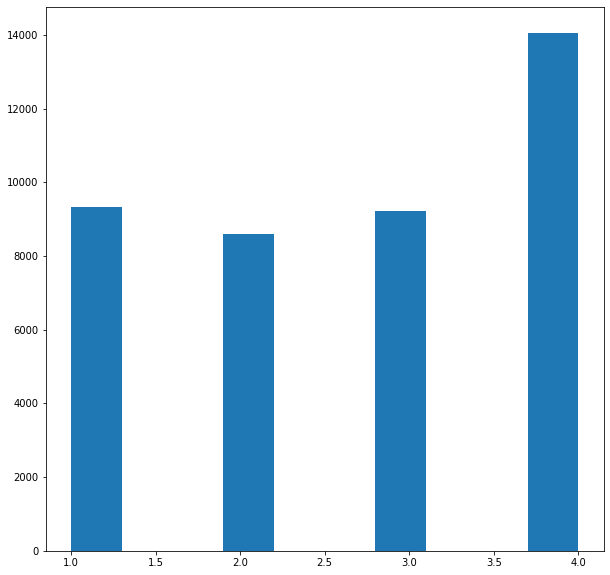

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(bank_client['age'])

plt.show()

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних:
Я перетворив змінну Age використовуючи її квартильні значення (поділив на 4 проміжки). Далі вивів діаграму кільості значень змінної для перевірки результатів. Найбіль численною виявилася група 4 (найстарша).

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [20]:
bank_relat = data[["contact", "month", "day_of_week", "duration"]]
print(bank_relat.head(10))
bank_relat.isnull().sum()

     contact month day_of_week  duration
0  telephone   may         mon       261
1  telephone   may         mon       149
2  telephone   may         mon       226
3  telephone   may         mon       151
4  telephone   may         mon       307
5  telephone   may         mon       198
6  telephone   may         mon       139
7  telephone   may         mon       217
8  telephone   may         mon       380
9  telephone   may         mon        50


contact        0
month          0
day_of_week    0
duration       0
dtype: int64

Висновок 10:
Я виділив в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком. Після цього перевірив їх на існування пропусків.

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [21]:
print(bank_relat["contact"].unique())
print(bank_relat["month"].unique())
print(bank_relat["day_of_week"].unique())

['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


Висновок 11:
Я вивів всі унікальні значення атрибутів contact, month, day_of_week.
Судячи з них банк не обробляв дзвінки у вихідні та вибірка предтавлена лише за 10 місяців.

# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



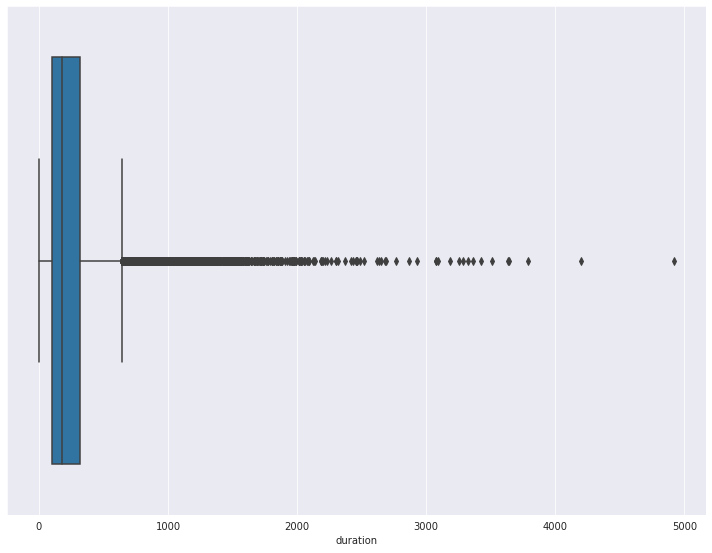

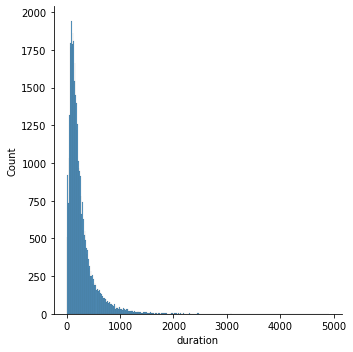

In [22]:
f = plt.figure(figsize=(10, 15))
gs = f.add_gridspec(2, 1)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(data=bank_relat, x="duration")


sns.displot(data=bank_relat, x="duration")

f.tight_layout()

Висновок 12:
Я побудував графіки для аналізу змінної duration, дивлячись на них можна сказати що ця змінна має багато викидів.

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [23]:
bank_relat = encode_categorical_columns(bank_relat, ["contact", "month", "day_of_week"])
bank_relat.head(100)

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
95,1,6,1,221
96,1,6,1,426
97,1,6,1,287
98,1,6,1,197


Висновок 13:
Я закодував категоріальні змінні Contact, Month, Day of Week до неперервних числових. 

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [24]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column
    
    df: pd.DataFrame to encode
    duration_col: duration col to encode 
    """
    arr = dataframe[duration_col].quantile([0.25, 0.5, 0.75]).to_numpy()
    dataframe[duration_col] = dataframe[duration_col].transform(lambda x: func(x, arr))
    return dataframe

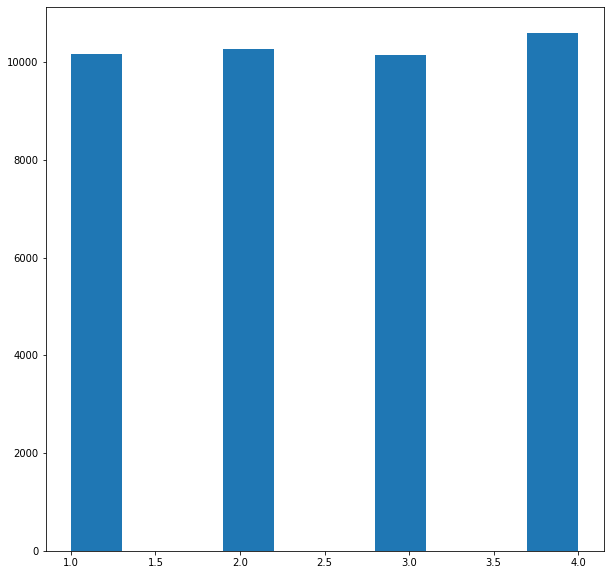

In [25]:
bank_relat = encode_duration(bank_relat, 'duration')

fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(bank_relat['duration'])
plt.show()

Висновок 14:
Я перетворив змінну duration використовуючи її квартильні значення (поділив на 4 проміжки). Далі вивів діаграму кільості значень змінної для перевірки результатів. Групи вийшли майже однаковими.

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [26]:
bank_socec = data[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
bank_socec.head(10000)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
9995,1.4,94.465,-41.8,4.959,5228.1
9996,1.4,94.465,-41.8,4.959,5228.1
9997,1.4,94.465,-41.8,4.959,5228.1
9998,1.4,94.465,-41.8,4.959,5228.1


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [27]:
bank_other = data[["campaign", "pdays", "previous", "poutcome"]]
bank_other.head(100)

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
95,1,999,0,nonexistent
96,1,999,0,nonexistent
97,1,999,0,nonexistent
98,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [28]:
bank_other["poutcome"] = bank_other["poutcome"].replace(["failure", "nonexistent", "success"], [0, 1, 2])
bank_other.head(100)

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1
...,...,...,...,...
95,1,999,0,1
96,1,999,0,1
97,1,999,0,1
98,1,999,0,1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [35]:
bank_final= pd.concat([bank_client, pd.concat([bank_relat, bank_other], axis=1, sort=False)], axis=1, sort=False)
bank_final= bank_final.drop('duration', axis =1)
print(bank_final.head(100))

    age  job  marital  education  default  housing  loan  contact  month  \
0     4    3        1          0        0        0     0        1      6   
1     4    7        1          3        1        0     0        1      6   
2     2    7        1          3        0        2     0        1      6   
3     3    0        1          1        0        0     0        1      6   
4     4    7        1          3        0        0     2        1      6   
..  ...  ...      ...        ...      ...      ...   ...      ...    ...   
95    3    7        1          5        0        2     0        1      6   
96    3    4        1          6        0        0     0        1      6   
97    4    0        0          6        1        0     0        1      6   
98    2    9        2          5        0        0     0        1      6   
99    3    1        1          1        0        0     0        1      6   

    day_of_week  campaign  pdays  previous  poutcome  
0             1         1    999

<AxesSubplot:title={'center':'data correlation method Pearson'}>

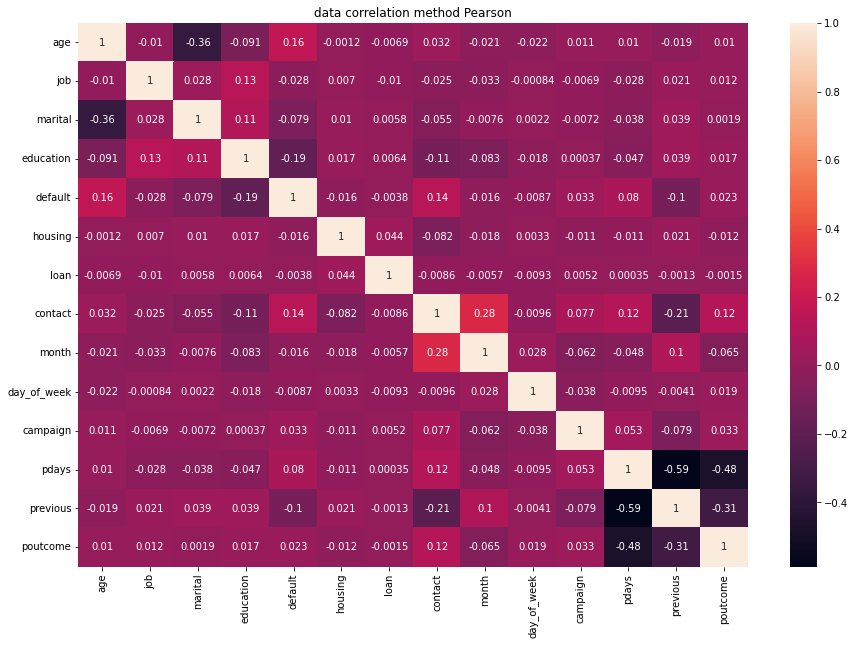

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('data correlation method Pearson')
sns.heatmap(bank_final.corr(method='pearson'), cbar=True, annot=True, fmt='.2g')

Висновок 18:
Я з'єднав всі блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки тому я видалив колонку duration. Також я побудував дататасет на мультиколінеарні змінні.

**Завдання 19** Провести ділення вибірки

In [37]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [39]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [40]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

In [41]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [42]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7206   73]
 [ 779  180]]
90.0


## k-NN

k=1 84.16 (+/- 0.72)
k=2 88.73 (+/- 0.56)
k=3 87.89 (+/- 0.53)
k=4 89.14 (+/- 0.73)
k=5 89.07 (+/- 0.65)
k=6 89.47 (+/- 0.71)
k=7 89.47 (+/- 0.73)
k=8 89.55 (+/- 0.71)
k=9 89.63 (+/- 0.75)
k=10 89.67 (+/- 0.71)
k=11 89.68 (+/- 0.75)
k=12 89.70 (+/- 0.66)
k=13 89.70 (+/- 0.73)
k=14 89.65 (+/- 0.74)
k=15 89.71 (+/- 0.75)
k=16 89.65 (+/- 0.77)
k=17 89.69 (+/- 0.78)
k=18 89.62 (+/- 0.75)
k=19 89.66 (+/- 0.78)
k=20 89.66 (+/- 0.77)
k=21 89.70 (+/- 0.75)
k=22 89.66 (+/- 0.74)
k=23 89.69 (+/- 0.71)
k=24 89.64 (+/- 0.70)
k=25 89.70 (+/- 0.71)
The optimal number of neighbors is 14 with 89.7%


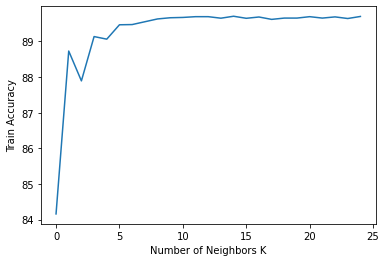

In [43]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7215   64]
 [ 801  158]]
89.0


## Логістична Регресія

In [45]:
models = pd.DataFrame({
                'Models': ["Логістична регресія", "K-nn"],
                'Score':  [LOGCV, KNNCV]})

models.sort_values(by='Score', ascending=False)
models.head()

,Models,Score
0,Логістична регресія,0.897307
1,K-nn,0.894880


**Висновки по моделям (детальні)**

1. Ми розділили датасет на тестовий 20% та навчальний 80% від загалної кількості. Та на основі оброблених раніше данних начили дві різні моделі: логістичної регресії та класифікації методом найблищих сусідів.      
2. За допомогою чих моделей ми змогли передбачити (таргет) можливість оформлення клієнтом депозиту по тестовому датасету.
3. Отримані результати були схожими по точності проте звичайна логістична регресія виявилася трішки точнішою 89.7% проти 89.4%.